## Import das bibliotecas

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns

## Carregando e analisando a bases de dados

In [59]:
from google.colab import files
uploaded = files.upload()

Saving automoveis.xlsx to automoveis (3).xlsx


In [60]:
# Salvando a base em um dataframe
auto = pd.read_excel(next(iter(uploaded.keys())))

# Visualizando informações básicas do dataset como dimensão, as informações nas colunas e tipos de dados
print('\nDimensões:\n{0}\n'.format(auto.shape))
print('\nCampos:\n{0}\n'.format(list(auto.keys())))
print('\nTipos de dados:\n{0}\n'.format(auto.dtypes))


Dimensões:
(205, 15)


Campos:
['Fabricante', 'Combustível', 'Portas', 'Estilo Chassis', 'Tração', 'Comprimento', 'Largura', 'Altura', 'Tipo de motor', 'Número de cilindros', 'Tamanho do motor', 'Tipo de injeção', 'Potência (HP)', 'Pico RPM', 'Preço']


Tipos de dados:
Fabricante              object
Combustível             object
Portas                 float64
Estilo Chassis          object
Tração                  object
Comprimento             object
Largura                 object
Altura                  object
Tipo de motor           object
Número de cilindros     object
Tamanho do motor        object
Tipo de injeção         object
Potência (HP)           object
Pico RPM                object
Preço                   object
dtype: object



In [61]:
# utilizando a função info para verificar layers com informações faltantes
print(auto.info())

categ = auto.dtypes[auto.dtypes == 'object'].index
print('\n', auto[categ].describe(), sep='\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fabricante           203 non-null    object 
 1   Combustível          200 non-null    object 
 2   Portas               203 non-null    float64
 3   Estilo Chassis       205 non-null    object 
 4   Tração               205 non-null    object 
 5   Comprimento          205 non-null    object 
 6   Largura              205 non-null    object 
 7   Altura               205 non-null    object 
 8   Tipo de motor        205 non-null    object 
 9   Número de cilindros  205 non-null    object 
 10  Tamanho do motor     205 non-null    object 
 11  Tipo de injeção      205 non-null    object 
 12  Potência (HP)        205 non-null    object 
 13  Pico RPM             205 non-null    object 
 14  Preço                205 non-null    object 
dtypes: float64(1), object(14)
memory usage: 

## Tratamento da base de dados

In [62]:
# Convertendo virgulas em ponto e transformando em variavel tipo float
auto['Comprimento'] = [x.replace(',', '.') for x in auto['Comprimento']]
auto['Comprimento'] = auto['Comprimento'].astype(float);

auto['Preço'] = [x.replace(',', '.') for x in auto['Preço']]
auto['Preço'] = auto['Preço'].astype(float);

auto['Largura'] = [x.replace(',', '.') for x in auto['Largura']]
auto['Largura'] = auto['Largura'].astype(float);

auto['Altura'] = [x.replace(',', '.') for x in auto['Altura']]
auto['Altura'] = auto['Altura'].astype(float);

auto['Pico RPM'] = [x.replace(',', '.') for x in auto['Pico RPM'].astype(str)]
auto['Pico RPM'] = auto['Pico RPM'].astype(float);

auto['Potência (HP)'] = [x.replace(',', '.') for x in auto['Potência (HP)']]
auto['Potência (HP)'] = auto['Potência (HP)'].astype(float);

# Sendo as variáveis tipo float(numéricas) visualizando a estatística descritiva dos dados
print(auto.dtypes)
print(auto.describe())
print(auto[auto.dtypes[auto.dtypes == 'object'].index ].describe())

Fabricante              object
Combustível             object
Portas                 float64
Estilo Chassis          object
Tração                  object
Comprimento            float64
Largura                float64
Altura                 float64
Tipo de motor           object
Número de cilindros     object
Tamanho do motor        object
Tipo de injeção         object
Potência (HP)          float64
Pico RPM               float64
Preço                  float64
dtype: object
           Portas  Comprimento  ...       Pico RPM         Preço
count  203.000000   205.000000  ...     205.000000    205.000000
mean     3.123153   174.049268  ...   10727.320683  13207.129366
std      0.994841    12.337289  ...   56645.349327   7868.768212
min      2.000000   141.100000  ...    4150.000000   5118.000000
25%      2.000000   166.300000  ...    4800.000000   7788.000000
50%      4.000000   173.200000  ...    5200.000000  10595.000000
75%      4.000000   183.100000  ...    5500.000000  16500.000000
m

# Tratamento de Outliers e padronização de tipo de variável


count     205
unique      7
top         4
freq      159
Name: Número de cilindros, dtype: int64
[4 6 5 3 'doze' 2 'oito']
48     doze
69     oito
70     oito
71     oito
72     oito
127    oito
Name: Número de cilindros, dtype: object
count    205.000000
mean       4.380488
std        1.080854
min        2.000000
25%        4.000000
50%        4.000000
75%        4.000000
max       12.000000
Name: Número de cilindros, dtype: float64


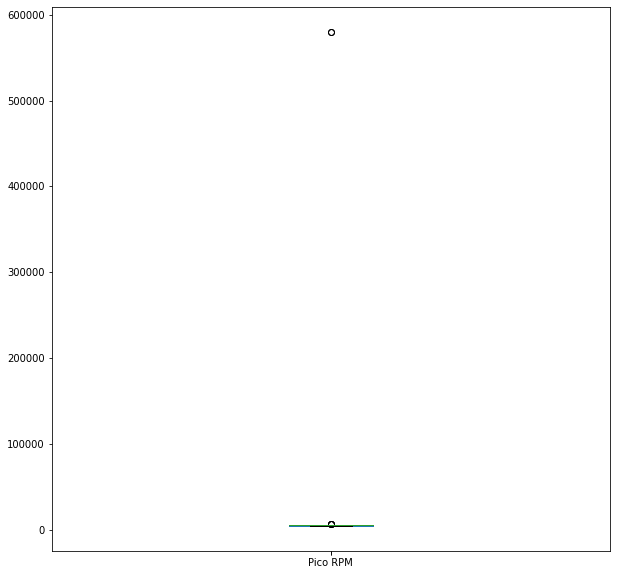

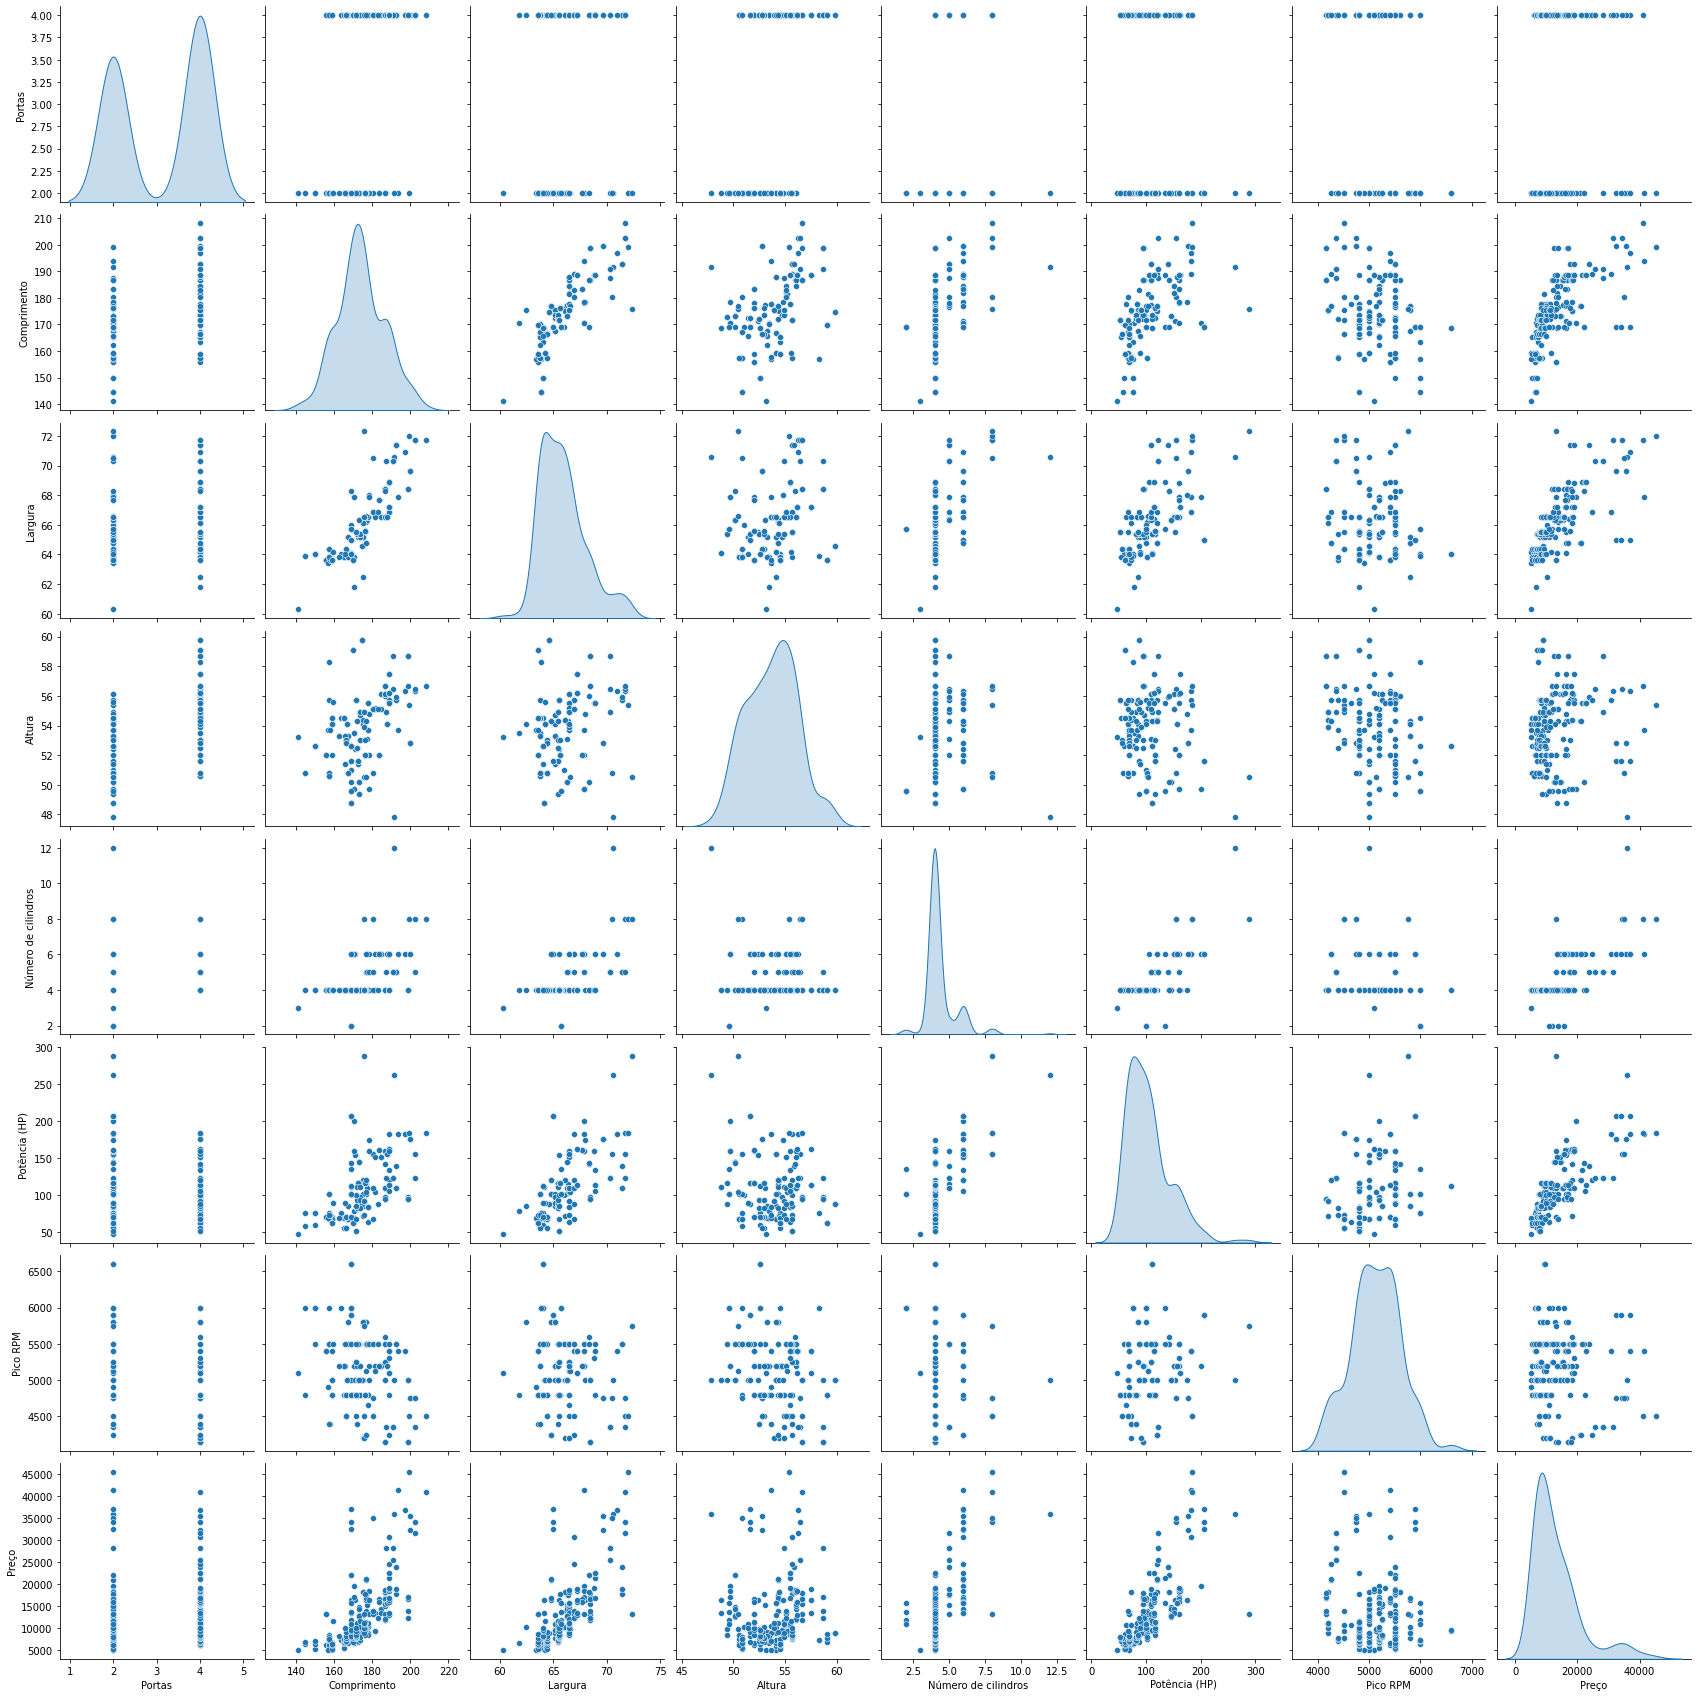

In [63]:
# Identificando informações incorretas na base como número de cilindros por extenso e convertendo em númerico
print(auto['Número de cilindros'].describe())
print(auto['Número de cilindros'].unique())

index = np.where([type(x) == str for x in auto['Número de cilindros']])
print(auto['Número de cilindros'].iloc[index])

ncilindros = np.where(auto['Número de cilindros'] == 'oito', 8, auto['Número de cilindros'])
ncilindros = np.where(ncilindros == 'doze', 12, ncilindros)
auto['Número de cilindros'] = ncilindros.astype(int)

print(auto['Número de cilindros'].describe())

# Analise de outliers avaliando valor Pico RPM discrepante em relação a média
auto['Pico RPM'].plot(kind='box', figsize = (10, 10))

# Possivel erro de digitação dividindo o valor discrepante por 100, eliminando o outlier
max_rpm = max(auto['Pico RPM'])
auto['Pico RPM'] = np.where(auto['Pico RPM'] == max_rpm, max_rpm/100, auto['Pico RPM'])
auto['Pico RPM'].plot(kind='box', figsize = (10, 10))

sns.pairplot(auto, height=3, diag_kind='kde')

In [64]:
# Conversão da variável Portas para categorica
categ_portas = pd.Categorical(auto['Portas'])
categ_portas = categ_portas.rename_categories(['Duas portas', 'Quatro portas'])
auto['Portas'] = categ_portas


print('\nTipos dos dados:\n{0}'.format(auto.dtypes))
categ = auto.dtypes[auto.dtypes == "category"].index
print('\n', auto[categ].describe(), sep='\n')


Tipos dos dados:
Fabricante               object
Combustível              object
Portas                 category
Estilo Chassis           object
Tração                   object
Comprimento             float64
Largura                 float64
Altura                  float64
Tipo de motor            object
Número de cilindros       int64
Tamanho do motor         object
Tipo de injeção          object
Potência (HP)           float64
Pico RPM                float64
Preço                   float64
dtype: object


               Portas
count             203
unique              2
top     Quatro portas
freq              114


## Eliminando variáveis desnecessárias para esse análise

In [65]:
del auto['Altura']
del auto['Comprimento']
del auto['Largura']
del auto['Tamanho do motor']

In [66]:
# Conversão da variável Número de cilindros em numérica
pd.to_numeric(auto['Número de cilindros'])

0      4
1      4
2      6
3      4
4      5
      ..
200    6
201    6
202    4
203    6
204    2
Name: Número de cilindros, Length: 205, dtype: int64

## Avaliação da moda das variáveis objeto para substituir valores faltantes

In [67]:
auto['Fabricante'].describe()

count        203
unique        22
top       toyota
freq          32
Name: Fabricante, dtype: object

In [68]:
# Substituir os valores faltantes pela moda "Toyota"
fabri_complet = np.where(auto['Fabricante'].isnull(),
                         'Toyota',
                         auto['Fabricante'])
auto['Fabricante'] = fabri_complet

print(auto['Fabricante'].describe())

count        205
unique        23
top       toyota
freq          32
Name: Fabricante, dtype: object


In [69]:
auto['Combustível'].describe()

count     200
unique      2
top       gas
freq      180
Name: Combustível, dtype: object

In [70]:
# Substituir os valores faltantes pela moda "gas"
comb_complet = np.where(auto['Combustível'].isnull(),
                        'gas',
                        auto['Combustível'])
auto['Combustível'] = comb_complet

print(auto['Combustível'].describe())

count     205
unique      2
top       gas
freq      185
Name: Combustível, dtype: object


In [71]:
auto['Portas'].describe()

count               203
unique                2
top       Quatro portas
freq                114
Name: Portas, dtype: object

In [72]:
# Substituir os valores faltantes pela moda "Quatro portas"
port_complet = np.where(auto['Portas'].isnull(),
                        'Quatro portas',
                        auto['Portas'])
auto['Portas'] = port_complet

print(auto['Portas'].describe())

count               205
unique                2
top       Quatro portas
freq                116
Name: Portas, dtype: object


In [73]:
# Check se ainda existem valores faltantes
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fabricante           205 non-null    object 
 1   Combustível          205 non-null    object 
 2   Portas               205 non-null    object 
 3   Estilo Chassis       205 non-null    object 
 4   Tração               205 non-null    object 
 5   Tipo de motor        205 non-null    object 
 6   Número de cilindros  205 non-null    int64  
 7   Tipo de injeção      205 non-null    object 
 8   Potência (HP)        205 non-null    float64
 9   Pico RPM             205 non-null    float64
 10  Preço                205 non-null    float64
dtypes: float64(3), int64(1), object(7)
memory usage: 17.7+ KB


In [55]:
# Avaliação de outliers na coluna "Pico RPM"
auto['Pico RPM'].describe()

count     205.000000
mean     5061.623122
std       673.097094
min        66.000000
25%      4800.000000
50%      5125.370000
75%      5500.000000
max      6000.000000
Name: Pico RPM, dtype: float64

Registros com valores outliers:
    Fabricante Combustível         Portas  ... Potência (HP) Pico RPM    Preço
106     peugot      diesel  Quatro portas  ...          95.0   4150.0  13200.0
108     peugot      diesel  Quatro portas  ...          95.0   4150.0  13860.0
110     peugot      diesel  Quatro portas  ...          95.0   4150.0  16900.0
112     peugot      diesel  Quatro portas  ...          95.0   4150.0  17075.0
114     peugot      diesel  Quatro portas  ...          95.0   4150.0  17950.0

[5 rows x 11 columns]


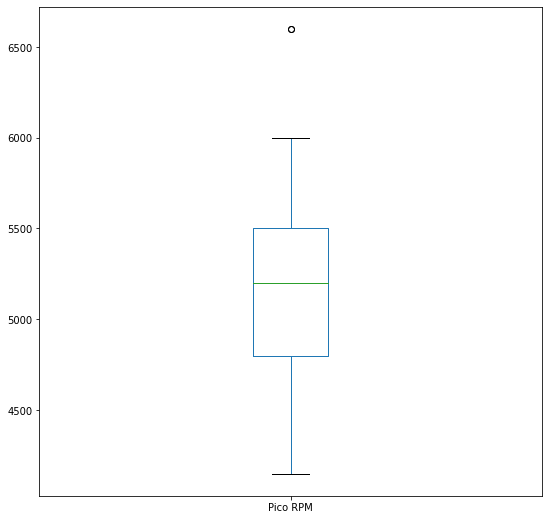

In [74]:
# Tratamento de outlier, nesse caso valor muito abaixo da média: média 5061, outlier 66
auto['Pico RPM'].plot(kind='box', figsize=(9,9))

index = np.where(auto['Pico RPM'] == min(auto['Pico RPM']))

print('Registros com valores outliers:', auto.loc[index], sep='\n')

In [75]:
# Check após o tratamento do outlier 66 do pico RPM
auto['Pico RPM'].describe()

count     205.000000
mean     5125.369463
std       476.979093
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: Pico RPM, dtype: float64